In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
#what kind of data is in Measurement Table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2b3e706d310>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [9]:
#what kind of data is in Station Table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2b3e3a33820>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'station': 'USC00519397',
 'longitude': -157.8168}

date is available in the Measurement table

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement,func.max(Measurement.date))
for row,i in recent_date:
    print("most recent date: ",i)

most recent date:  2017-08-23


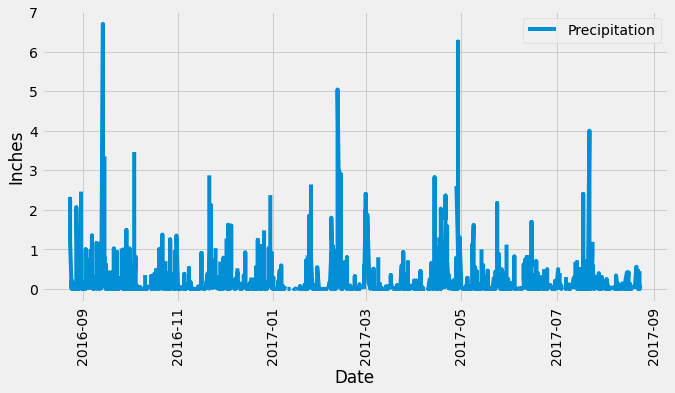

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#convert to datetime type
i_dt= pd.to_datetime(i)
i_dt

# Calculate the date one year from the last date in data set.
#one_year_ago
one_year_ago=i_dt-dt.timedelta(days=1*365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
prec_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > "2016-08-23")

# Save the query results as a Pandas DataFrame and set the index to the date column    
score=[]
date=[] 
for row,i in prec_score:
    score.append(i)
    date.append(row)

data={'Date':date,'Score':score}
prec_score_df = pd.DataFrame(data)
prec_score_df.head()


# Sort the dataframe by date
prec_score_df["Date"] = pd.to_datetime(prec_score_df["Date"])

prec_score_df = prec_score_df.sort_values(by="Date")

prec_score_df=prec_score_df.set_index('Date')
prec_score_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
plt.plot(prec_score_df.index.values,prec_score_df['Score'],label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_score_df.describe()

,Score
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station).count()
total_stations

19550

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp=session.query(Measurement.tobs, func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281")
for row in max_temp:
    print("Max temp is: ",row[0])
    
max_temp=session.query(Measurement.tobs, func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281")
for row in max_temp:
    print("Min temp is: ",row[0])
    
max_temp=session.query(Measurement.tobs, func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281")
for row in max_temp:
    print("Average temp is: ",row[0])

Max temp is:  85.0
Min temp is:  54.0
Average temp is:  70.0


In [16]:
recent_dates = session.query(Measurement.date,func.max(Measurement.date).filter(Measurement.station == "USC00519281"))
                             
for row,i in recent_dates:
    print("most recent date: ",i)

most recent date:  2017-08-18


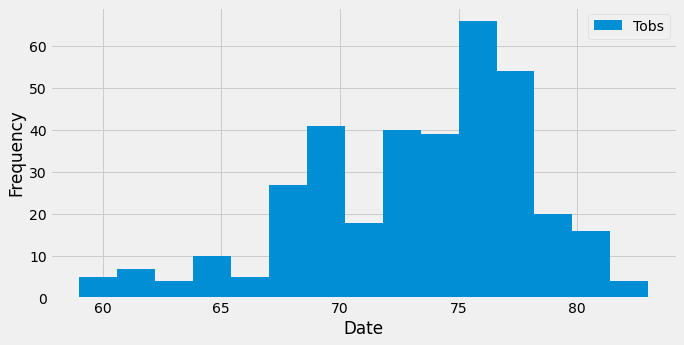

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281" , Measurement.date > "2016-08-18")

# Save the query results as a Pandas DataFrame and set the index to the date column    
temp=[]
date2=[] 
for row,i in tobs:
    temp.append(i)
    date2.append(row)

data2={'Date':date2,'Temp':temp}
tobs_df = pd.DataFrame(data2)


# Sort the dataframe by date
tobs_df["Date"] = pd.to_datetime(tobs_df["Date"])

tobs_df = tobs_df.sort_values(by="Date")

tobs_df=tobs_df.set_index('Date')
tobs_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
plt.hist(tobs_df['Temp'],bins=15,label="Tobs")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

# Close session

In [18]:
# Close Session
session.close()